# Latihan Linear Regression dan Grid Search pada Salary Data

Created by: Gian Hadipriyanto

Tips:
- Norebook ini dikerjakan di Jupyter Notebook melalui Visual Studio Code
- Untuk mempercepat proses, gunakan Google Collabolatory

In [13]:
# import semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


# Masukkan data


In [14]:
data = pd.read_csv("Salary_Data.csv.xls")


In [15]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

# Menampilkan data


In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [17]:
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [18]:
data.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Bisa juga menampilkan data dengan warna bedasarkan tingkat nilai/value


In [19]:
data.head().style.background_gradient(cmap='pink_r')


,YearsExperience,Salary
0,1.100000,39343.000000
1,1.300000,46205.000000
2,1.500000,37731.000000
3,2.000000,43525.000000
4,2.200000,39891.000000


In [20]:
data.describe().style.background_gradient(cmap='pink_r')


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Atau bisa juga dengan grafis chart

In [21]:
fig = px.line(data, title="Data Salary", x="YearsExperience",
              y="Salary", markers=True, width=500, height=500)
fig.show()


# Modeling Linear Regression


In [22]:
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values.reshape(-1, 1)


Split data set dan train


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


Fitting model


In [24]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

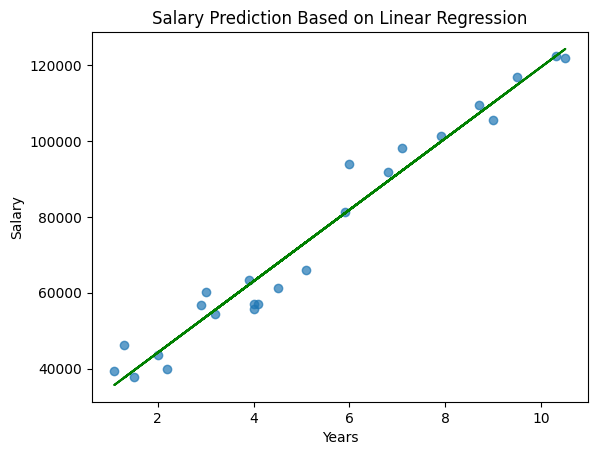

In [25]:
plt.scatter(X_train, y_train, alpha= 0.7)
plt.plot(X_train, linreg.predict(X_train), color = "green")
plt.title('Salary Prediction Based on Linear Regression')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.show()

Prediksi Linear Regression

In [26]:
y_head = linreg.predict(X_test)

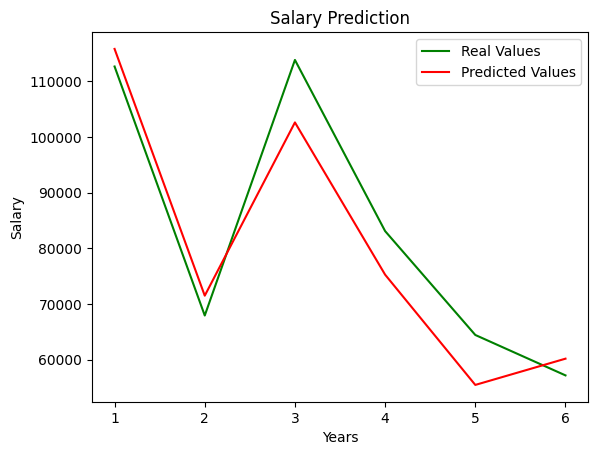

In [27]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='g',linestyle='-',label="Real Values")
plt.plot(c,y_head,color='r',linestyle='-',label="Predicted Values")
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.legend()
plt.show()

Plotting Error

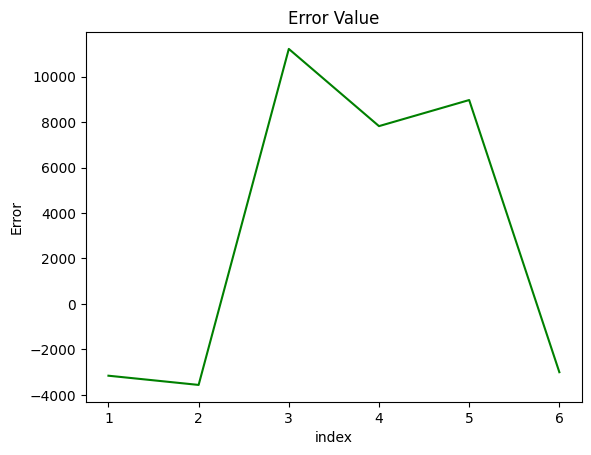

In [29]:
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_head,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

# Grid Search


In [30]:
X = data['YearsExperience']
X.head()


0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [31]:
# memisahkan Atribut dan label
y = data['Salary']
y.head()


0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [32]:
# mengubah bentuk
X = np.array(X)[:, np.newaxis]


Import Library gridsearchCV dan SVR


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
grid_search.fit(X, y)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

Menampilkan Grid Saerch parameter


In [34]:
print(grid_search.best_params_)


{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


Membuat model SVM baru


In [35]:
new_model = SVR(C=100000, gamma=0.005, kernel='rbf')
new_model.fit(X, y)


SVR(C=100000, gamma=0.005)

Visualisasi Suport Vector Machine (Regression)


Text(0, 0.5, 'Salary')

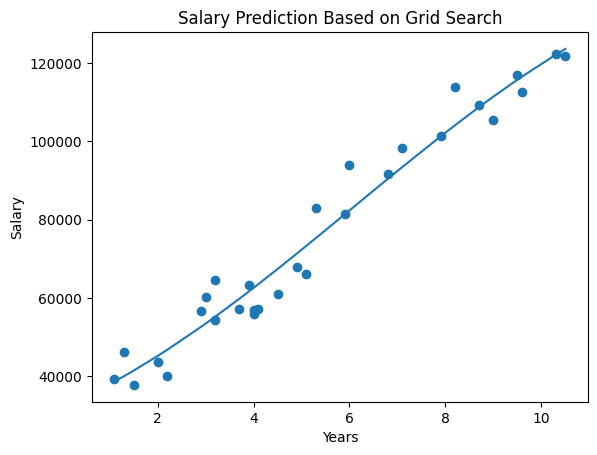

In [36]:
plt.scatter(X, y)
plt.plot(X, new_model.predict(X))
plt.title('Salary Prediction Based on Grid Search')
plt.xlabel('Years')
plt.ylabel('Salary')
